<a href="https://colab.research.google.com/github/DCAISP/Audio-Processing/blob/main/Audio_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오디오 처리(Audio Processing)


* 소리는 진동으로 인한 공기의 압축으로 생성
* 압축이 얼마나 됬느냐에 따라 진동하며, 공간이나 매질을 전파해 나가는 현상인 Wave(파동)으로 표현
* 파동에서 얻을 수 있는 정보
  + 위상(Phase; Degress of displacement)
  + 진폭(Amplitude; Intensity)
  + 주파수(Frequency)

![](https://miro.medium.com/max/700/0*QFVha2lCgyhKjhuO.gif)





## 오디오 라이브러리

* librosa는 각종 음성 처리에 유용한 라이브러리
* colab 환경에서 torchaudio는 별도 설치가 필요
* 해당 예제에서는 torchaudio를 이용해 음성 데이터를 가져옴

In [1]:
!pip install torchaudio


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'seaborn-v0_8-<style>'

import librosa
import librosa.display
import torch
import torchaudio
import IPython.display as ipd

# 라이브러리 설치

## 오디오 데이터

*   pytorch의 torchaudio를 사용해 내장 데이터셋을 가져옴
*   데이터가 크기 때문에 시간이 많이 소요

In [5]:
train_dataset = torchaudio.datasets.LIBRISPEECH("./", url = "train-clean-100", download=True)
test_dataset = torchaudio.datasets.LIBRISPEECH("./", url = "test-clean", download=True)

100%|██████████| 5.95G/5.95G [05:24<00:00, 19.7MB/s]
100%|██████████| 331M/331M [00:20<00:00, 16.6MB/s]


train_dataset 변수는 "train-clean-100" 데이터셋을 저장하기 위한 변수이며, torchaudio.datasets.LIBRISPEECH 함수의 첫 번째 인자로는 데이터셋을 저장할 경로인 "./"를 전달하였습니다. 두 번째 인자로는 데이터셋의 URL인 "train-clean-100"을 전달하였고, download=True를 설정하여 데이터셋을 다운로드하도록 지시하였습니다.

test_dataset 변수는 "test-clean" 데이터셋을 저장하기 위한 변수이며, 마찬가지로 torchaudio.datasets.LIBRISPEECH 함수를 사용하여 데이터셋을 다운로드합니다. 경로는 "./"로 설정하고, URL은 "test-clean"으로 지정하였으며, 다운로드를 위해 download=True로 설정하였습니다.

이 코드를 실행하면 LIBRISPEECH 데이터셋의 "train-clean-100"과 "test-clean" 데이터셋이 지정된 경로에 다운로드됩니다



*   불러온 데이터 확인
  *   첫번째 줄에서는 소리 데이터 확인 가능
  *   두번째 줄에선 해당 데이터의 sampling rate 확인 가능





In [6]:
test_dataset[1]

(tensor([[ 0.0010,  0.0011,  0.0009,  ..., -0.0007, -0.0010, -0.0011]]),
 16000,
 'STUFF IT INTO YOU HIS BELLY COUNSELLED HIM',
 1089,
 134686,
 1)



*   불러온 데이터의 형상을 확인
*   데이터 길이만으로는 음성이 몇초에 해당하는지(duration)를 알 수 없음



In [7]:
test_dataset[2][0].shape

torch.Size([1, 106000])

## 샘플링(Sampling)

### Sampling

* 음성을 처리하기 위해 아날로그 정보를 잘게 쪼개 이산적인 디지털 정보로 표현해야 함
* 이때 무한히 쪼개서 저장할 수는 없으므로, 기준을 세워 아날로그 정보를 쪼개 대표값을 사용, 이를 샘플링이라 함
* 주로 사용할 때 시간을 기준으로 아날로그 정보를 쪼개는 Time Domain 방식을 사용

* Sampling rate
  * sampling rate는 아날로그 정보를 얼마나 잘게 쪼갤지를 결정
  * 잘게 쪼갤수록 정보 손실이 줄어들지만, 데이터의 크기가 늘어남
* Sampling theorem
  * sampling rate가 최대 frequency보다 2배 커져야 함을 의미
  * 일반적으로 sampling은 인간의 청각 영역에 맞게 형성
    - Audio CD : 44.1 kHz(44100 sample/second)
    - Speech communication : 8 kHz(8000 sample/second) 전화기를 사용했을때, 주파수가 어느정도되어야 communication에 문제가 없는지의 기준이 1초에 8000개의 sample을 내는 8KHZ이다.







*   음성의 duration은 데이터의 길이와 sampling rate를 나누어 확인 가능


In [8]:
audio_data = test_dataset[1][0][0]
sr = test_dataset[1][1]

print(audio_data, sr)
print('length:', len(audio_data))
print('duration:', len(audio_data) / sr)

ipd.Audio(audio_data, rate=sr)

tensor([ 0.0010,  0.0011,  0.0009,  ..., -0.0007, -0.0010, -0.0011]) 16000
length: 52400
duration: 3.275


해당 코드는 test_dataset에서 두 번째 인덱스의 오디오 데이터와 샘플링 속도를 추출하여 출력하고, 그 오디오 데이터를 재생하는 코드입니다.

test_dataset[1][0][0]는 test_dataset에서 두 번째 인덱스의 오디오 데이터를 추출하는 부분입니다. 오디오 데이터는 변수 audio_data에 저장됩니다.

test_dataset[1][1]는 test_dataset에서 두 번째 인덱스의 샘플링 속도를 추출하는 부분입니다. 샘플링 속도는 변수 sr에 저장됩니다.

print(audio_data, sr)는 audio_data와 sr 변수의 값을 출력하는 부분입니다.

print('length:', len(audio_data))는 audio_data의 길이를 출력하는 부분입니다. len(audio_data)는 오디오 데이터의 길이를 나타냅니다.

print('duration:', len(audio_data) / sr)는 audio_data의 길이를 sr로 나누어서 오디오 데이터의 재생 시간을 출력하는 부분입니다. 재생 시간은 len(audio_data) / sr로 계산됩니다.

마지막으로 ipd.Audio(audio_data, rate=sr)는 audio_data를 sr의 샘플링 속도로 재생하는 부분입니다. 이 코드를 실행하면 오디오 데이터가 재생됩니다.

### Resampling

* Resampling은 sampling data의 sampling rate를 조정해 다시 sampling하는 것
* 이때 일반적으로 보간(interpolation)을 할때는 low-pass filter를 사용
* `librosa.resample`을 사용하면 편리하게 resampling 가능
* 현재 데이터는 `torch tensor`, `librosa`는 `numpy` 배열을 받아들이기 때문에 변환 필요
* sampling rate를 절반으로 줄여, 길이도 절반으로 준 것을 확인할 수 있음


In [9]:
audio_np = audio_data.numpy()
y_8k = librosa.resample(audio_np, sr, target_sr=4000)

print(len(audio_np), len(y_8k))
ipd.Audio(y_8k, rate=4000)
'''
실행시 용량이 줄어드는데, 그 이유는 샘플링하는 성분이 2배정도 줄어들었기 때문이다. 그대신 음성을 알아듣는데 더 힘들다.
'''

TypeError: resample() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [ ]:
[0]

### Normalization & Quantization

*   데이터간 음량이 제각각인 경우 normalization을 하여 amplitude를 [-1, 1] 범위로 조정
*   여기서는 가장 간단한 방법인 데이터의 최대값으로 나눠주는 방법을 사용



In [10]:
audio_np = audio_data.numpy()
normed_wav = audio_np / max(np.abs(audio_np))
ipd.Audio(normed_wav, rate=sr)

'''
큰차이를 느끼긴 어렵다...
'''

'\n큰차이를 느끼긴 어렵다...\n'

In [11]:
bit = 8
max_value = 2** (bit -1)

quantized_8_wav = normed_wav * max_value
quantized_8_wav = np.round(quantized_8_wav).astype(int)
quantized_8_wav = np.clip(quantized_8_wav, -max_value, max_value-1)
ipd.Audio(quantized_8_wav, rate=sr)

'''
round는 숫자 반 올림 처리를 해준다.
실행시 음질은 떨어지고 용량은 감소한다.
'''


'\nround는 숫자 반 올림 처리를 해준다.\n실행시 음질은 떨어지고 용량은 감소한다.\n'

### Mu-Law Encoding

* 사람의 귀는 작은소리의 차이는 잘잡아내는데 반해 소리가 커질수록 그 차이를 잘 느끼지 못함
* 이러한 특성을 wave값을 표현하는데 반영해 작은 값에는 높은 분별력을, 큰 값끼리는 낮은 분별력을 갖도록 함



In [14]:
def mu_law(x, mu=255):
  return np.sign(x) * np.log(1 + mu * np.abs(x)) / np.log(1 + mu)

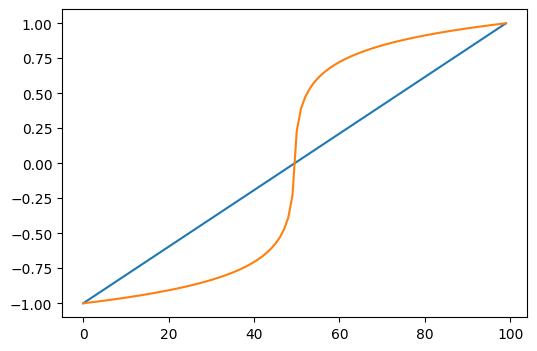

'\n그래프를 보면, 파란색 선을 현재 주황색 선으로 바꾸어 놓은 것이다.\n작은 값에는 높은 분별력을 부여하는 것은 작은 진폭의 소리가 상대적으로 더 작은 wave 값으로 표현되어야 한다는 의미이다.\n예를 들어, 소리의 세기가 매우 작은 부분을 표현할 때는 작은 wave 값으로 상세하게 표현할 수 있어야 함\n이렇게 함으로써 작은 진폭의 변화를 민감하게 감지하고 표현할 수 있다.\n반대로 큰 값끼리는 낮은 분별력을 갖도록 한다는 것은 큰 진폭의 소리가 상대적으로 작은 wave 값으로 표현되어야 한다는 의미\n큰 진폭의 변화가 상대적으로 작은 wave 값의 변화로 표현되면서, 큰 진폭의 소리를 더 넓은 범위의 wave 값으로 표현할 수 있다.\n이렇게 함으로써 큰 진폭의 소리를 상대적으로 작은 숫자 범위 내에서 효과적으로 표현할 수 있습니다.\n결국 작은 값과 큰 값 모두 결국에는 작은 범위 내에서 표현되어야 한다.\n작은 진폭의 소리는 작은 값으로 세밀하게 표현되고, 큰 진폭의 소리는 큰 값으로 상대적으로 넓은 범위 내에서 표현된다.\n작은 값은 작은 진폭의 변화를 민감하게 감지하고 표현하기 위해 작은 범위 안에서 표현되어야 한다. 작은 범위 내에서 더 많은 숫자가 사용되므로 작은 변화도 정확하게 표현할 수 있다.\n반면에 큰 값은 큰 진폭의 변화를 상대적으로 덜 민감하게 표현하기 위해 작은 범위 내에서 표현됩니다. 큰 범위 내에서 적은 숫자가 사용되므로 큰 변화도 상대적으로 감지할 수 있다.\n결국 작은 값과 큰 값은 모두 작은 범위 내에서 표현되어야 하지만, 작은 값은 더 높은 분별력을 갖도록 표현되고, 큰 값은 낮은 분별력을 갖도록 표현된다.\n이렇게 함으로써 오디오 신호의 다양한 진폭을 효과적으로 표현하고 처리할 수 있게 된다.\n'

In [15]:
x = np.linspace(-1, 1, 100)
x_mu = mu_law(x)

plt.figure(figsize=[6, 4])
plt.plot(x)
plt.plot(x_mu)
plt.show()

'''
그래프를 보면, 파란색 선을 현재 주황색 선으로 바꾸어 놓은 것이다.
작은 값에는 높은 분별력을 부여하는 것은 작은 진폭의 소리가 상대적으로 더 작은 wave 값으로 표현되어야 한다는 의미이다.
예를 들어, 소리의 세기가 매우 작은 부분을 표현할 때는 작은 wave 값으로 상세하게 표현할 수 있어야 함
이렇게 함으로써 작은 진폭의 변화를 민감하게 감지하고 표현할 수 있다.
반대로 큰 값끼리는 낮은 분별력을 갖도록 한다는 것은 큰 진폭의 소리가 상대적으로 작은 wave 값으로 표현되어야 한다는 의미
큰 진폭의 변화가 상대적으로 작은 wave 값의 변화로 표현되면서, 큰 진폭의 소리를 더 넓은 범위의 wave 값으로 표현할 수 있다.
이렇게 함으로써 큰 진폭의 소리를 상대적으로 작은 숫자 범위 내에서 효과적으로 표현할 수 있습니다.
결국 작은 값과 큰 값 모두 결국에는 작은 범위 내에서 표현되어야 한다.
작은 진폭의 소리는 작은 값으로 세밀하게 표현되고, 큰 진폭의 소리는 큰 값으로 상대적으로 넓은 범위 내에서 표현된다.
작은 값은 작은 진폭의 변화를 민감하게 감지하고 표현하기 위해 작은 범위 안에서 표현되어야 한다. 작은 범위 내에서 더 많은 숫자가 사용되므로 작은 변화도 정확하게 표현할 수 있다.
반면에 큰 값은 큰 진폭의 변화를 상대적으로 덜 민감하게 표현하기 위해 작은 범위 내에서 표현됩니다. 큰 범위 내에서 적은 숫자가 사용되므로 큰 변화도 상대적으로 감지할 수 있다.
결국 작은 값과 큰 값은 모두 작은 범위 내에서 표현되어야 하지만, 작은 값은 더 높은 분별력을 갖도록 표현되고, 큰 값은 낮은 분별력을 갖도록 표현된다.
이렇게 함으로써 오디오 신호의 다양한 진폭을 효과적으로 표현하고 처리할 수 있게 된다.
'''

In [17]:
wav_mulaw = mu_law(normed_wav)
ipd.Audio(wav_mulaw, rate=sr)

# 오디오 표현(Audio Representation)

* Sampling된 discrete한 데이터를 표현
  + 시간의 흐름에 따라, 공기의 파동의 크기로 보는 Time-Domain Representation 방법
  + 시간에 따라서 frequency의 변화를 보는 Time-Frequency Representation

## Waveform - Time-Domain Representation

* Waveform은 오디오의 자연적인 표현
* 시간이 x축으로 그리고 amplitude가 y축으로 표현

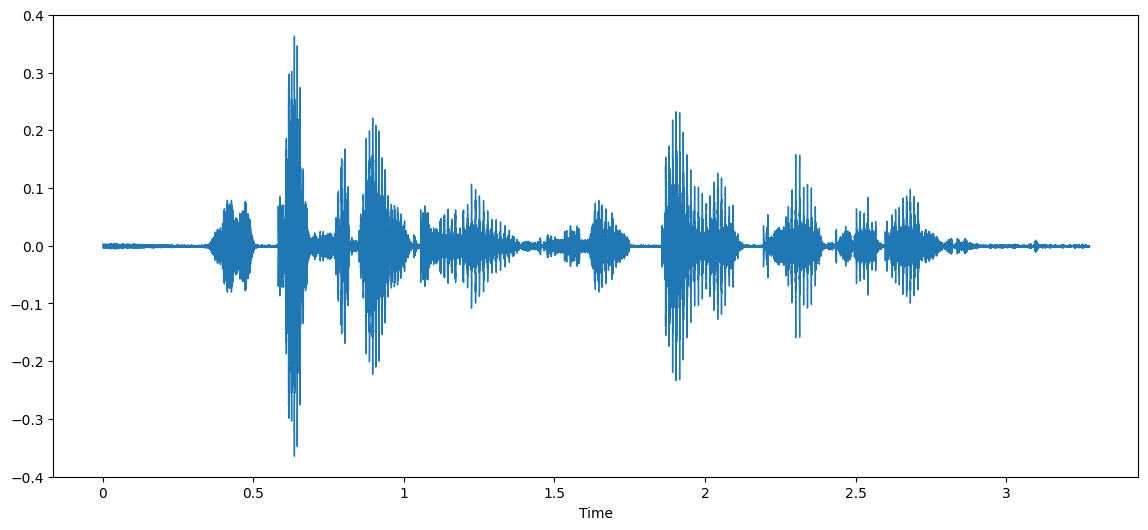

In [16]:
audio_np = audio_data.numpy()

fig = plt.figure(figsize=(14, 6))
librosa.display.waveshow(audio_np[0:100000], sr=sr);

## 정현파(Sinusoid) - Time-Frequency Representation

![](https://upload.wikimedia.org/wikipedia/commons/6/61/FFT-Time-Frequency-View.png)

* 모든 신호는 주파수(frequency)와 크기(magnitude), 위상(phase)이 다른 정현파(sinusolida signal)의 조합으로 나타낼 수 있음
* 퓨리에 변환은 조합된 정현파의 합(하모니) 신호에서 그 신호를 구성하는 정현파들을 각각 분리해내는 방법

In [18]:
def Sinusoid(A, f, phi, fs, t):
  t = np.arange(0, t, 1.0/fs)
  x = A* np.cos(2*np.pi*f*t+phi)
  return x

In [19]:
A = 0.9
f = 340
phi = np.pi/2
fs = 22050
t = 1

In [20]:
sin = Sinusoid(A, f, phi, fs, t)

In [21]:
A = 0.9
f = 260
phi = np.pi/2
fs = 22050
t = 1

In [22]:
sin2 = Sinusoid(A, f, phi, fs, t)

In [23]:
complexwav = sin + sin2

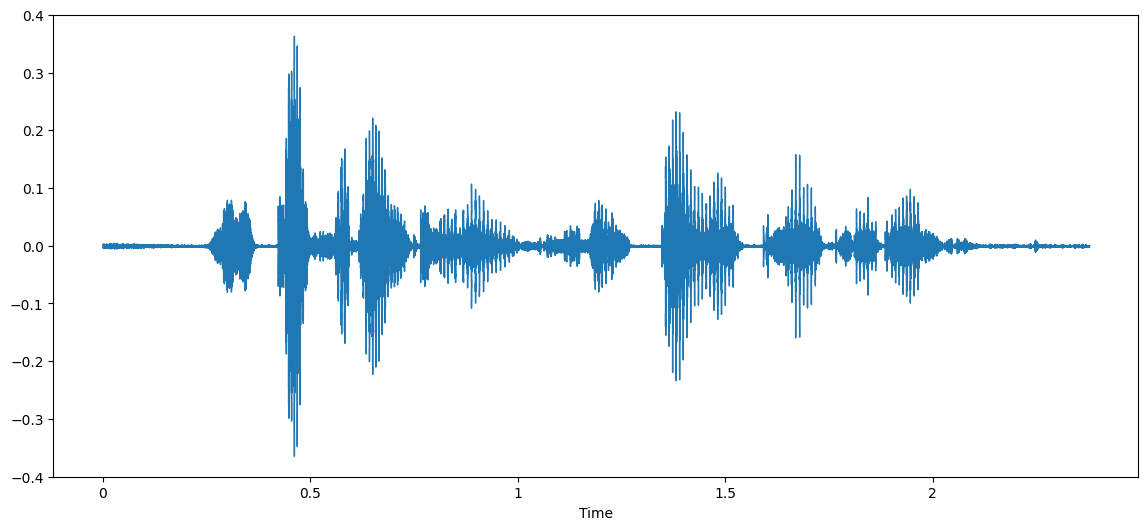

In [24]:
fig = plt.figure(figsize=(14, 6))
librosa.display.waveshow(audio_np[0:100000], sr=fs);

In [25]:
ipd.Audio(sin + sin/2 + sin/4, rate = fs)

In [26]:
def generate_sinusoid_scale(pitches=[69], duration=0.5, fs=22050, amplitude_max=0.5):
  N = int(duration * fs)
  t = np.arange(N) / fs
  x = []
  for p in pitches:
    omega = 2 ** ((p - 69) / 12) * 440
    x = np.append(x, np.sin(2*np.pi*omega*t))
  x = amplitude_max * x / np.max(x)
  return x

In [27]:
duration = 1
fs = 22050
pitches = [36, 48, 60, 72, 84, 96]
x  = generate_sinusoid_scale(pitches=pitches, duration=duration, fs=fs)
print('Pitche class C = {..., C1, C2, C3, C4, C5, C6, ...}')
ipd.display(ipd.Audio(data=x, rate=fs))
'''
pitch 값을 각각 넣어준다음에 scale로 표현한 것이다.
'''

Pitche class C = {..., C1, C2, C3, C4, C5, C6, ...}


'\npitch 값을 각각 넣어준다음에 scale로 표현한 것이다.\n'

## 푸리에 변환(Fourier Fransform)


* 푸리에 변환은 임의의 입력 신호를 다양한 주파수를 갖는 주기 함수들의 합으로 분해하여 표현하는 것을 의미
* 푸리에 변환 식
$$
A_k = \frac{1}{T} \int_{-\frac{T}{2}}^\frac{T}{2} f(t) \, \exp \left( -i\cdot 2\pi \frac{k}{T} t \right) \, dt
$$
$$
y(t)=\sum_{k=-\infty}^\infty A_k \, \exp \left( i\cdot 2\pi\frac{k}{T} t \right)
$$



* 위 식에는 주기 함수들은 포함되어 있지 않음
* 오일러 공식에 따라 다음과 같이 지수 함수와 주기 함수간 관계를 나타낼 수 있음
$$
e^{i\theta} = \cos{\theta} + i\sin{\theta}
$$

* 해당 식을 오일러 공식에 따라 다음과 같이 표현 가능

$$
\exp \left( i\cdot 2\pi\frac{k}{T} t \right) = \cos\left({2\pi\frac{k}{T}}\right) + i\sin\left({2\pi\frac{k}{T}}\right)
$$

*   결국 푸리에 변환은 입력 신호에 상관없이 sin, cos 같은 주기 함수들의 합으로 분해 가능함을 나타냄, (오일러 공식을 활용)

### 이산 푸리에 변환(Discrete Fourier Transform, DFT)



*   우리가 샘플링한 데이터는 discrete data라고 할 수 있음, 우리가 가지고 있는 컴퓨터 내부 데이터는 실제로 discrete data 형태이다.
*   위의 푸리에 변환을 이산 영역으로 생각해볼 수 있음
*   우리가 수집한 데이터 $y_n$에서 이산 시계열 데이터가 주기 N으로 반복한다고 할때, DFT는 주파수와 진폭이 다른 N개의 사인 함수 합으로 표현 가능 (시계열 데이터 : 일정한 시간간격으로 측정되거나 기록된 시퀀스를 의미한다.)
$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} Y_k \cdot \exp \left( i\cdot 2\pi\frac{k}{N} n \right)
$$

*   위 식을 보면 k의 range가 0부터 $N-1$로 변화했음을 알 수 있음
*   이때 Spectrum $Y_{k}$는 원래의 시계열 데이터에 대한 퓨리에 변환값
*   그래서, 원래의 시계열 데이터의 푸리에 변환값에서 주기성을 한번더 계산 한 것이다

$$
Y_k = \sum_{n=0}^{N-1} y_n\cdot \exp \left( -i\cdot 2\pi\frac{k}{N} n \right)
$$

  * $y_{n}$ : input signal
  * $n$ : Discrete time index
  * $k$ : discrete frequency index
  * $Y_{k}$ : k번째 frequeny에 대한 Spectrum의 값



* DFT 수식을 코드로 나타내면 다음과 같음

In [28]:
def DFT(x):
  N = len(x)
  X = np.array([])
  nv = np.arange(N)

  for k in range(N):
    s = np.exp(1j * 2 * np.pi * k / N * nv)
  return X

### Short-Time Fourier Transform(STFT)



*   DFT는 시간에 흐름에 따라 신호의 수파수가 변했을때, 어느 시간대에 주파수가 변하는지 모름
*   STFT는 시간의 길이를 나눠서 이제 퓨리에 변환
*   주파수의 특성이 시간에 따라 달라지는 사운드를 분석하는 방법이며 우리가 사용하는 signal 데이터에 적합
*   시계열 데이터를 일정한 시간 구간 (window size)로 나누고, 각 구간에 대해서 스펙트럼을 구함

*   STFT에 대한 식과 설명은 다음과 같음

$$
X(l,k) = \sum_{n=0}^{N-1} w(n) x(n+lH)\exp^{\frac{-2\pi k n}{N}}
$$

- $N$ : FFT size
    - Window를 얼마나 많은 주파수 밴드로 나누는가

- Duration
    - 샘플링 레이트를 window로 나눈 값
    - $T= window/SR$
    - T(Window) = 5T(Signal), duration은 신호주기보다 5배 이상 길게 잡아야함
    - 440Hz 신호의 window size는 5*(1/440)

- $w(n)$ : Window function
    - 일반적으로 Hann window 사용

- $n$ : Window size
    - Window 함수에 들어가는 Sample의 양
    - 작을수록 Low-frequency resolution을 가지게 되고, high-time resolution을 가짐
    - 길수록 High-frequency, low time resolution을 가짐
    
- $H$ : Hop size
    - 윈도우가 겹치는 사이즈, 일반적으로는 1/4정도를 겹치게 함

* STFT의 결과는 즉 시간의 흐름(Window)에 따른 Frequency영역별 Amplitude를 반환



In [29]:
print(audio_np.shape, sr)

(52400,) 16000


In [33]:
S = librosa.core.stft(audio_np, n_fft=1024, hop_length=512, win_length=1024 ) #1024개의 주파수밴드로 나눈다. 그리고 윈도우 사이즈 겹치는 정도는 512
print(S.shape, len(S[0]), S[0][0])  #S는현재 513 103의 shape를 가진다. 말그대로 STFT 결과의 shpae이며 length는 103이다

(513, 103) 103 (0.022626022+0j)


In [32]:
D = np.abs(S) ** 2
print(D.shape)

(513, 103)


<ipython-input-35-c12630c57ab6>:1: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  log_S = librosa.power_to_db(S, ref=np.max) #spectogram을 데시벨 형태로 바꾸어주는 것이 power_to_db이다.


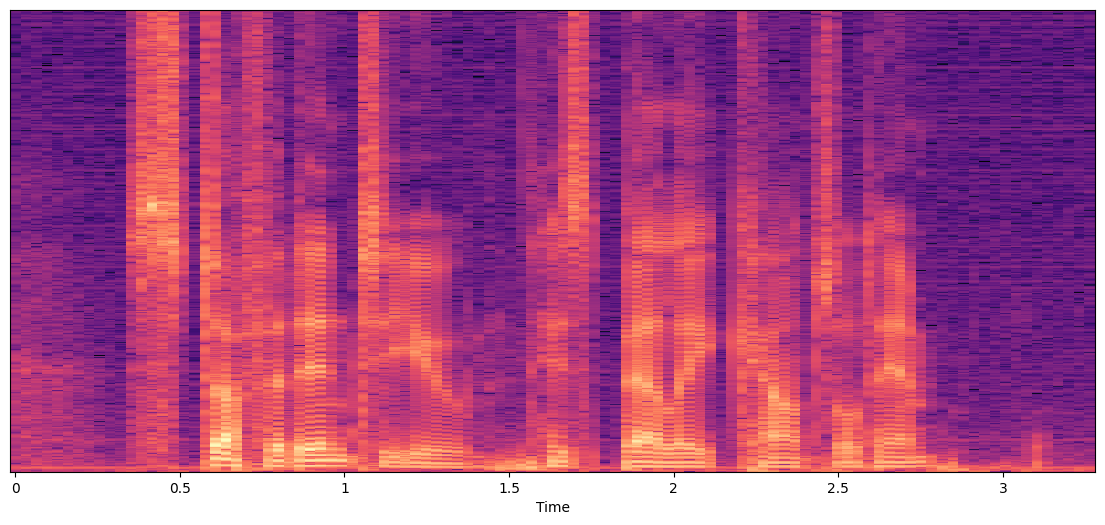

In [35]:
log_S = librosa.power_to_db(S, ref=np.max) #spectogram을 데시벨 형태로 바꾸어주는 것이 power_to_db이다.

plt.figure(figsize = (14, 6))
librosa.display.specshow(log_S, sr = 16000, x_axis='time')

#### 윈도우 함수(Window Function)

* Window function 기능
  1. main-lobe를 제어
  2. side-lobe의 레벨 trade-off를 제어
  3. 깁스 현상(불연속을 포함하는 파형이 푸리에 합성되었을 때 불연속 값에서 나타나는 불일치 현상) 방지



In [38]:
def frame_audio(audio, fft_size=1024, hop_size=20, sample_rate=22050):
  audio = np.pad(audio, int(fft_size/2), mode='reflect')
  frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
  frame_num = int((len(audio) - fft_size) / frame_len) + 1
  frames = np.zeros((frame_num, fft_size))

  for n in range(frame_num):
    frames[n] = audio[n*frame_len:n*frame_len + fft_size]

  return frames

audio_framed = frame_audio(audio_np)
print("Framed audio shape: {}".format(audio_framed.shape))

Framed audio shape: (119, 1024)


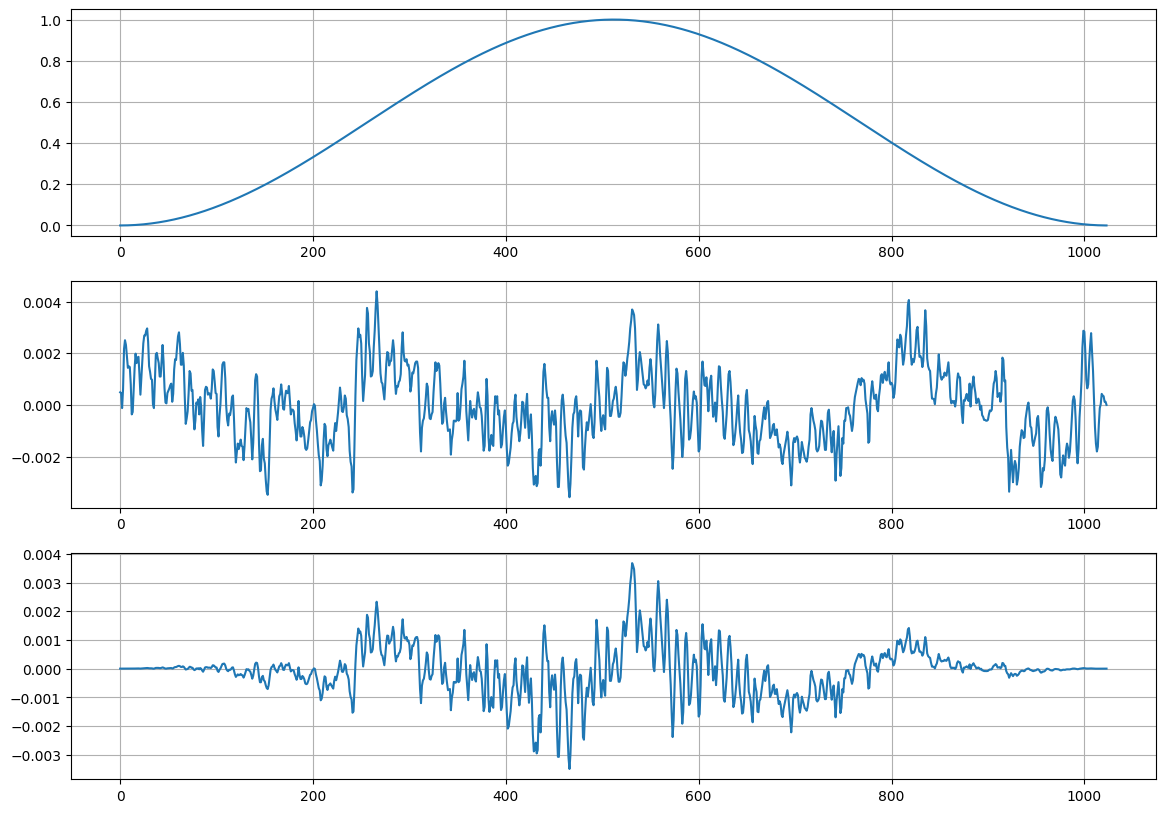

'\n주어진 코드는 scipy의 signal 모듈을 사용하여 한 번의 해밍(hann) 윈도우를 생성하고, 이를 오디오 데이터에 적용하여 윈도우 처리된 오디오를 시각화하는 예시입니다.\n먼저, signal.get_window("hann", 1024, fftbins=True) 코드는 "hann" 윈도우를 생성합니다. 윈도우 크기는 1024이며, \nfftbins 매개변수를 True로 설정하여 FFT에 대한 정규화를 적용합니다. 이렇게 생성된 윈도우는 window 변수에 할당됩니다.\n(FFT(고속 푸리에 변환)에 대한 정규화는 FFT의 결과를 적절한 크기로 조정하는 과정을 말합니다. FFT는 시간 도메인의 신호를 주파수 도메인으로 변환하는데, \n이때 FFT의 결과는 주파수 영역에서의 신호의 강도를 나타냅니다.\n정규화를 적용하는 이유는 FFT의 결과가 실제 신호의 크기에 비례하지 않을 수 있기 때문입니다. \n주로 사용되는 정규화 방법 중 하나는 "전력 스펙트럼 밀도(Power Spectral Density)"를 계산하는 것입니다. \n전력 스펙트럼 밀도는 FFT 결과의 크기를 제곱하여 양수로 만든 후, 주파수 대역폭에 대한 정규화를 수행합니다)\n다음으로, audio_framed는 오디오 데이터를 프레임화한 결과를 나타냅니다. audio_framed와 window를 곱하여 윈도우 처리된 오디오를 얻습니다. \n이 처리는 각 프레임의 오디오 데이터에 해당하는 윈도우 값을 곱하는 것을 의미합니다. 처리된 오디오는 audio_win 변수에 저장됩니다.\n마지막으로, plt.figure(figsize=(14, 10))를 사용하여 그래프의 크기를 설정합니다. \n그 다음, plt.subplot(3, 1, 1)을 통해 첫 번째 subplot을 생성하고, 이곳에 윈도우 값을 그래프로 표시합니다.\n마찬가지로 두 번째 subplot에는 원본 오디오 데이터를, 세 번째 subplot에는 윈도우 처리된 오디오를 그래프로 표시합니다. \nplt.grid(True)를 사용하여 그리

In [41]:
from scipy import signal

window = signal.get_window("hann", 1024, fftbins=True)
audio_win = audio_framed * window
idx = 3

plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
plt.plot(window)
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(audio_framed[idx])
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(audio_win[idx])
plt.grid(True)

plt.show()

'''
주어진 코드는 scipy의 signal 모듈을 사용하여 한 번의 해밍(hann) 윈도우를 생성하고, 이를 오디오 데이터에 적용하여 윈도우 처리된 오디오를 시각화하는 예시입니다.
먼저, signal.get_window("hann", 1024, fftbins=True) 코드는 "hann" 윈도우를 생성합니다. 윈도우 크기는 1024이며,
fftbins 매개변수를 True로 설정하여 FFT에 대한 정규화를 적용합니다. 이렇게 생성된 윈도우는 window 변수에 할당됩니다.
(FFT(고속 푸리에 변환)에 대한 정규화는 FFT의 결과를 적절한 크기로 조정하는 과정을 말합니다. FFT는 시간 도메인의 신호를 주파수 도메인으로 변환하는데,
이때 FFT의 결과는 주파수 영역에서의 신호의 강도를 나타냅니다.
정규화를 적용하는 이유는 FFT의 결과가 실제 신호의 크기에 비례하지 않을 수 있기 때문입니다.
주로 사용되는 정규화 방법 중 하나는 "전력 스펙트럼 밀도(Power Spectral Density)"를 계산하는 것입니다.
전력 스펙트럼 밀도는 FFT 결과의 크기를 제곱하여 양수로 만든 후, 주파수 대역폭에 대한 정규화를 수행합니다)
다음으로, audio_framed는 오디오 데이터를 프레임화한 결과를 나타냅니다. audio_framed와 window를 곱하여 윈도우 처리된 오디오를 얻습니다.
이 처리는 각 프레임의 오디오 데이터에 해당하는 윈도우 값을 곱하는 것을 의미합니다. 처리된 오디오는 audio_win 변수에 저장됩니다.
마지막으로, plt.figure(figsize=(14, 10))를 사용하여 그래프의 크기를 설정합니다.
그 다음, plt.subplot(3, 1, 1)을 통해 첫 번째 subplot을 생성하고, 이곳에 윈도우 값을 그래프로 표시합니다.
마찬가지로 두 번째 subplot에는 원본 오디오 데이터를, 세 번째 subplot에는 윈도우 처리된 오디오를 그래프로 표시합니다.
plt.grid(True)를 사용하여 그리드를 추가하고, plt.show()를 호출하여 그래프를 출력합니다.
이 코드는 윈도우 처리된 오디오 데이터와 해당 윈도우를 비교하여 시각적으로 확인할 수 있도록 도와줍니다
'''

#### 윈도우 크기(Window Size)




*   window size는 time과 frequency의 resolutions를 제어
  * short-window - 낮은 frequency resolutuon, 높은 time resolution
  * long-window - 높은 frequency resolution, 낮은 time resolution

  -작은 윈도우 크기를 사용하는 경우, 윈도우의 길이가 짧아서 주파수 영역에서 세밀한 변화를 감지할 수 있습니다. 즉, 높은 주파수 성분을 정확하게 분석할 수 있습니다. 하지만 시간 영역에서는 짧은 윈도우 길이로 인해 시간 해상도가 낮아지므로, 신호의 빠른 변화를 잡아내는 데는 제한을 받을 수 있습니다.

  -반면에 큰 윈도우 크기를 사용하는 경우, 윈도우의 길이가 길어져서 주파수 영역에서 높은 해상도를 얻을 수 있습니다. 주파수 대역폭이 좁아져서 주파수 성분의 정확한 분석이 가능합니다. 하지만 시간 영역에서는 긴 윈도우 길이로 인해 시간 해상도가 낮아지므로, 신호의 빠른 변화를 정확하게 포착하기에는 어려움이 있을 수 있습니다



## 스펙트로그램(Spectrogram)

* 스펙트로그램은 소리나 파동을 시각화하여 파악하기 위한 도구
* 파형과 스펙트럼의 특징이 조합되어 있음
* 시간 축과 주파수 축의 변화에 따라 진폭의 차이를 인쇄 농도나 표시 색상 차이로 표현



### Linear Frequency Scale



*   순음(single tone)들의 배음 구조를 파악하는데 적절
*   분포가 저주파수 영역에 치우쳐져 있음



### 멜 스케일(Mel Scale)



*   주파수 단위를 다음 공식에 따라 멜 스케일로 변환
$$
m = 2595 \log_{10}\left(1 + \frac{f}{700}\right)
$$
*   일반적으로 mel-scaled bin을 FFT size보다 조금 더 작게 만듬
*   해당 scale을 적용해 spectogram을 만든 것이 melspectogram
*   멜 스케일(Mel Scale)은 인간의 청각 특성을 반영하여 주파수를 인식하는 척도입니다. 이 척도는 주파수 간의 간격을 인간의 청각 감각에 더 잘 부합하도록 변환하는 역할을 합니다.


In [42]:
S = librosa.core.stft(audio_np, n_fft=1024, hop_length=512, win_length=1024)
D = np.abs(S) ** 2

In [48]:
mel_basis = librosa.filters.mel(sr=sr, n_fft=1024, n_mels=40)
mel_S = np.dot(mel_basis, D)
print(mel_S.shape)

(40, 103)


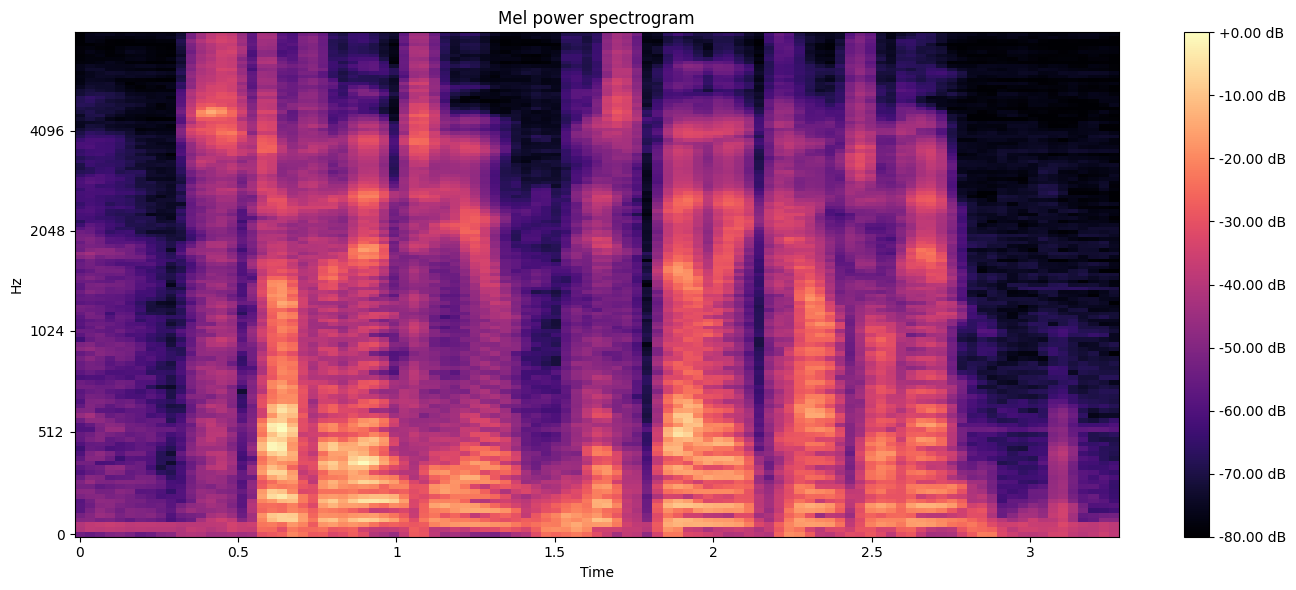

In [52]:
S = librosa.feature.melspectrogram(y=audio_np, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(14, 6))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram')
plt.colorbar(format = '%+ .2f dB')
plt.tight_layout()

### 바크 스케일(Bark Scale)

* 귀가 인식하는 주파수의 영역은 대략 $20Hz~2000Hz$로 가정, 하지만 주파수에 대한 사람의 인식은 비선형적
* 귀와 뇌의 가청대역을 24개의 대역으로 나눈것을 Bark라고 함
* Bark scale은 $500Hz$ 이하에서는 $100Hz$의 대역폭을, $500Hz$ 이상에서는 각 대역의 중심수파수의 대략 20%에 해당하는 대역폭을 가짐
  
  `20, 100, 200, 300, 400, 510, 630, 770, 920, 1080, 1270, 1480, 1720, 2000, 2320, 2700, 3150, 3700, 4400, 5300, 6400, 7700, 9500, 12000, 15500 ( Hz )`

### Log Compression



*   신호를 $ 10 * log10(\frac{S}{ref})$의 단위로 신호를 스케일링
*   spectrogram을 데시벨 유닛으로 전환


In [53]:
log_mel_S = librosa.power_to_db(mel_S)
print(log_mel_S.shape)

(40, 103)


## 이산 코사인 변환(Discrete Cosine Transform, DCT)



*   DCT는 n개의 데이터를 n개의 코사인 함수의 합으로 표현하여 데이터의 양을 줄이는 방식
*   저 주파수에 에너지가 집중되고 고 주파수 영역에 에너지가 감소
*   DCT가 데이터의 양을 줄일 수 있는 이유는 주로 데이터의 특성을 활용하기 때문입니다. 코사인 함수는 주기적이며 진폭과 주파수를 조절할 수 있는 특성을 가지고 있습니다. 따라서, 데이터를 코사인 함수의 합으로 표현하면, 데이터의 변화를 상대적으로 적은 수의 주파수 성분으로 표현할 수 있게 됩니다.

*   일반적으로 실제 데이터는 고주파 성분보다 저주파 성분이 더 많이 포함되어 있습니다. DCT는 이러한 특성을 활용하여 데이터를 변환하면, 상대적으로 적은 수의 주파수 성분으로 데이터를 표현할 수 있어서 데이터의 양을 줄일 수 있습니다. 이렇게 줄인 데이터는 원본 데이터와의 차이가 작아서, 압축 비율을 높일 수 있습니다

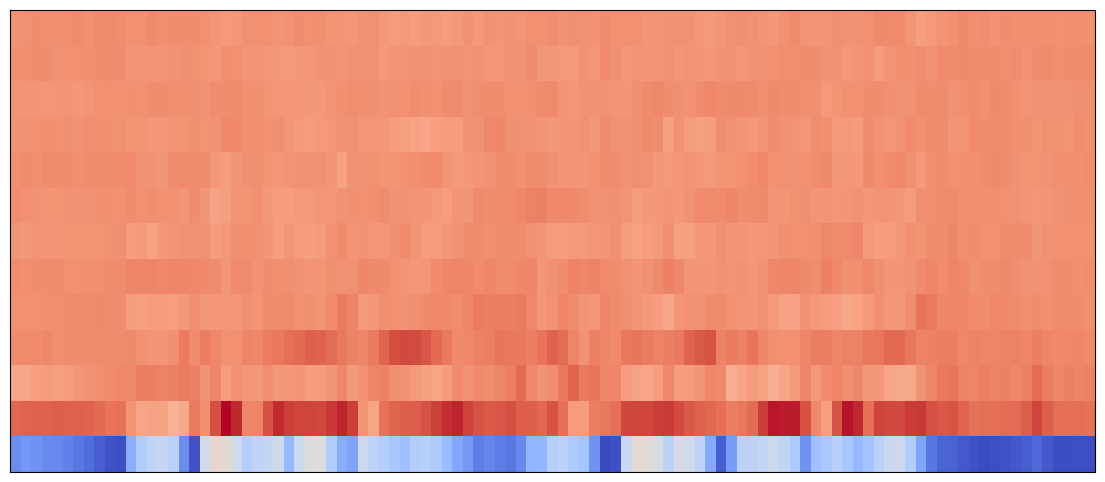

In [55]:
mfcc = librosa.feature.mfcc(S=log_mel_S, n_mfcc=13)
mfcc = mfcc.astype(np.float32)
plt.figure(figsize=(14,6))
librosa.display.specshow(mfcc)

'''
그림을 보면, 저주파수에서 에너지가 집중되고 고주파수에서는 에너지가 감소하는 형태의 그림을 볼 수 있다.
'''

(13, 103)


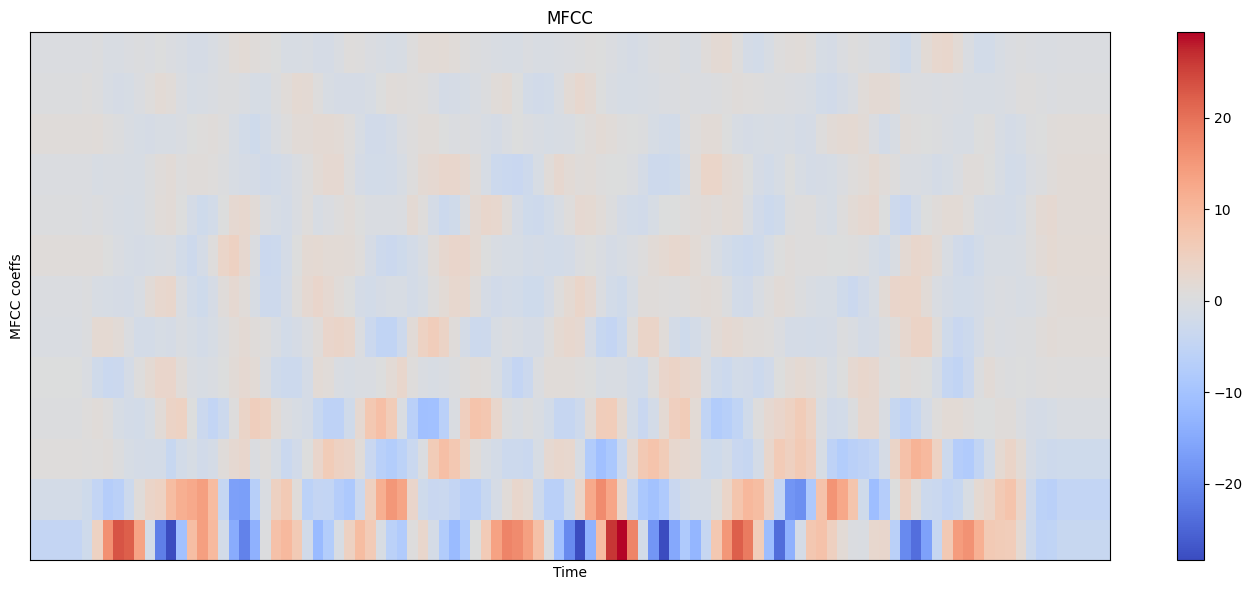

In [57]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
print(delta2_mfcc.shape)

plt.figure(figsize=(14, 6))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()


## 오디오 특징 추출(Audio Feature Extraction)

* 모든 오디오 신호는 많은 특징으로 구성
* 해결하려는 문제와 관련된 특성 추출 필요

### 스펙트럼 센트로이드(Spectral Centroid)

* 주파수의 스펙트럼의 가중 평균과 같음

In [60]:
spectral_centroids = librosa.feature.spectral_centroid(y=audio_np, sr=sr)[0]
print(spectral_centroids.shape)

(103,)


In [63]:
!pip install scikit-learn

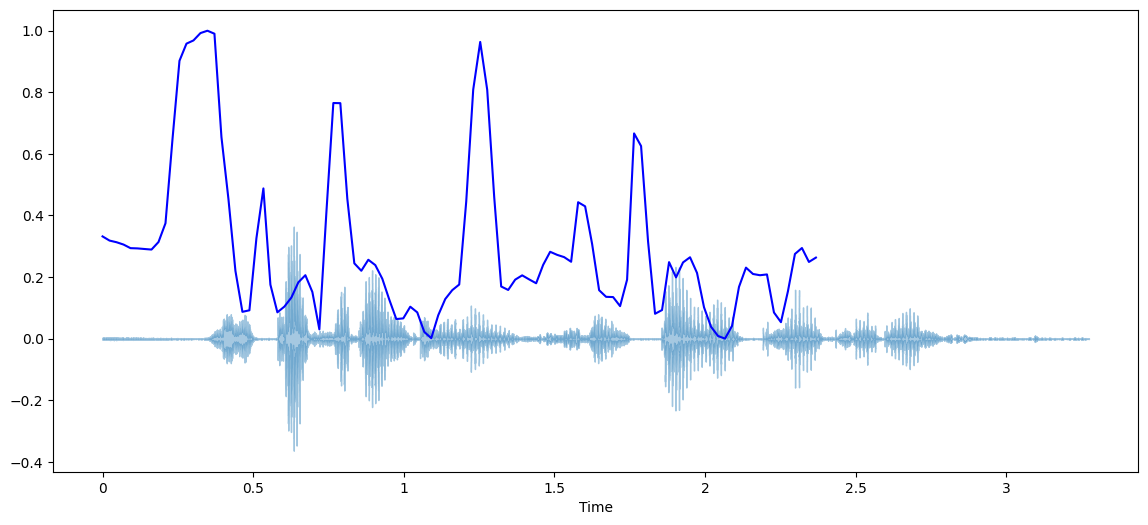

In [68]:
from sklearn.preprocessing import minmax_scale

plt.figure(figsize=(14,6))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

librosa.display.waveshow(audio_np, sr=sr, alpha=0.4)
plt.plot(t, minmax_scale(spectral_centroids, axis=0), color = 'b')



### 스펙트럼 롤오프(Spectral Rolloff)

* 신호의 모양을 측정
* 고주파수가 0으로 감소하는 주파수를 나타냄

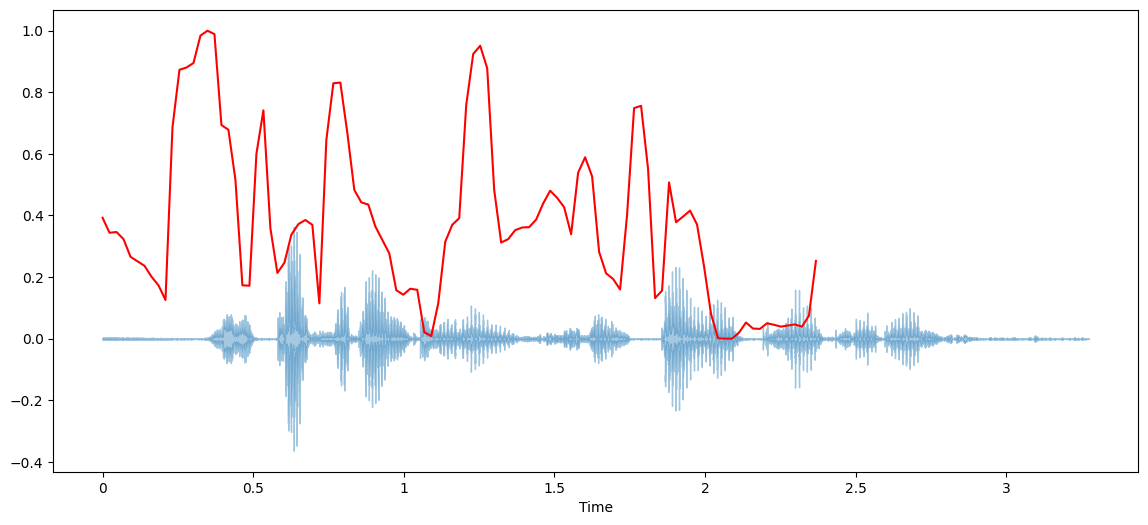

In [72]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_np+0.01, sr=sr)[0]
plt.figure(figsize=(14,6))

librosa.display.waveshow(audio_np, sr=sr, alpha=0.4)
plt.plot(t, minmax_scale(spectral_rolloff, axis=0), color = 'r')

### 스펙트럼 대역폭

* 스펙트럼 대역폭은 최대 피크의 절반 (또는 최대 절반의 전체 너비 [FWHM])에서 빛의 대역 폭으로 정의되며 두 개의 수직 빨간색 선과 파장 축에서 λSB로 표시

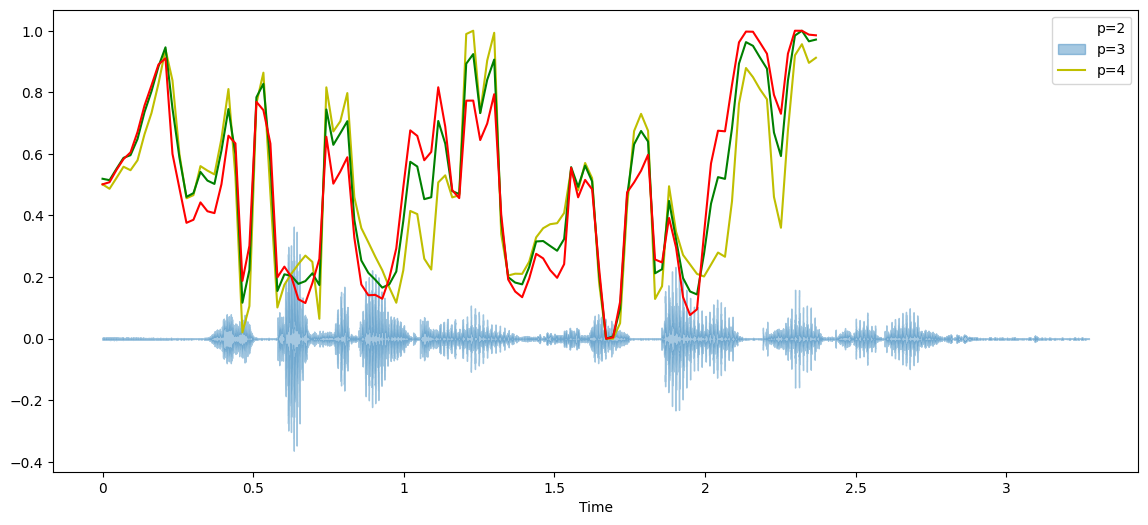

In [80]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=audio_np, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=audio_np, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=audio_np, sr=sr, p=4)[0]
plt.figure(figsize=(14,6))

librosa.display.waveshow(audio_np, sr=sr, alpha=0.4)
plt.plot(t, minmax_scale(spectral_bandwidth_2, axis=0), color = 'y')
plt.plot(t, minmax_scale(spectral_bandwidth_3, axis=0), color = 'g')
plt.plot(t, minmax_scale(spectral_bandwidth_4, axis=0), color = 'r')
plt.legend(('p=2', 'p=3', 'p=4'))

### 제로 크로싱 비율(Zero Crossing Rate)

* 신호의 부드러움을 측정하는 매우 간단한 방법은 해당 신호의 세그먼트 내에서 제로 크로싱 수를 계산하는 것
* 음성 신호는 느리게 진동 (예를 들어, 100Hz 신호는 초당 제로 100을 교차하는 반면 무성 마찰음은 초당 3000 개의 제로 교차를 가질 수 있음)

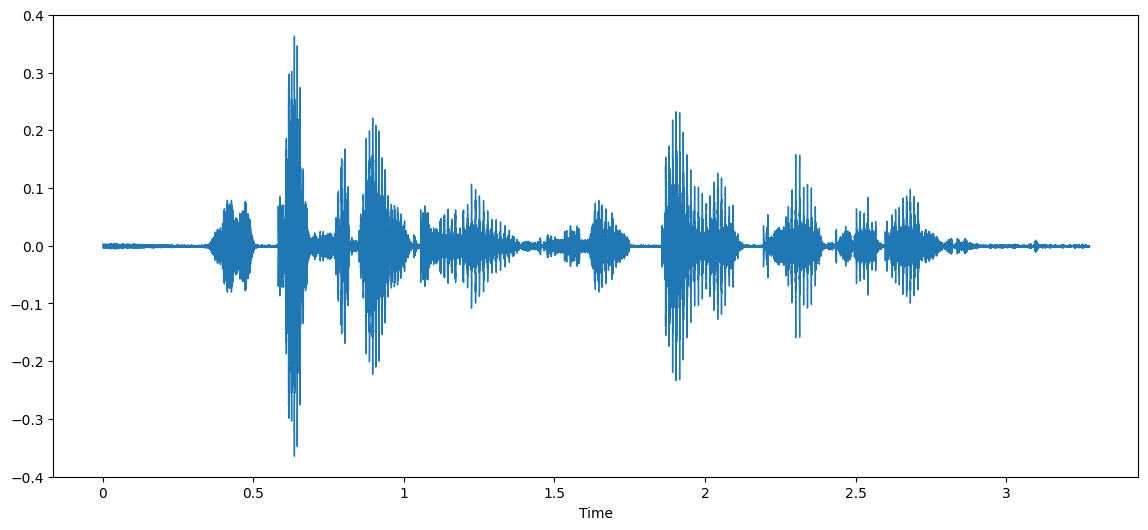

In [81]:
plt.figure(figsize=(14,6))
librosa.display.waveshow(y=audio_np, sr=sr)

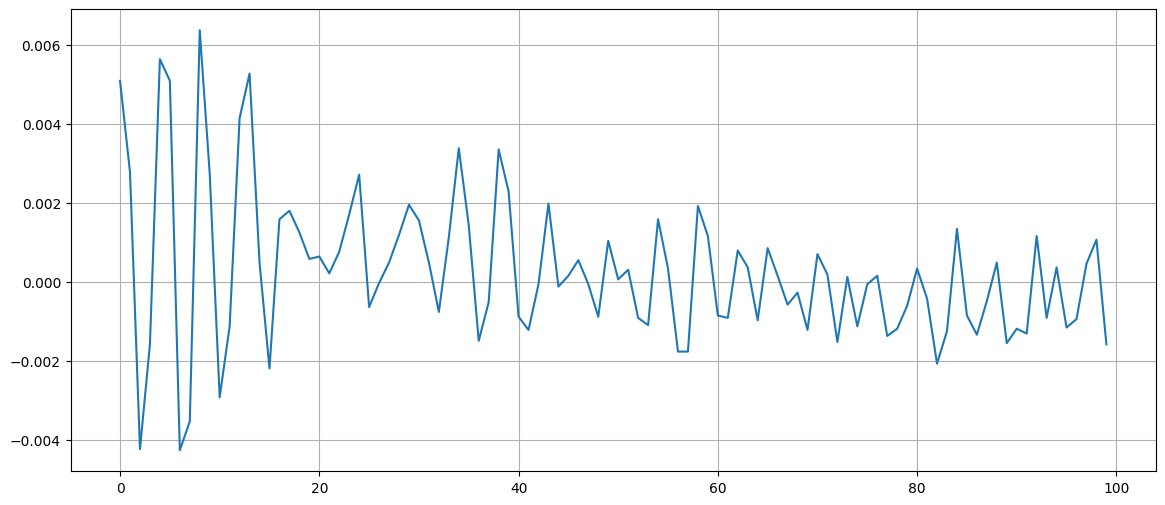

In [85]:
n0 = 8000
n1 = 8100
plt.figure(figsize=(14, 6))
plt.plot(audio_np[n0:n1])
plt.grid()


In [88]:
zero_crossings = librosa.zero_crossings(audio_np[n0:n1], pad=False)
print(zero_crossing.shape)
print(sum(zero_crossings))

zcrs = librosa.feature.zero_crossing_rate(audio_np)
print(zcrs.shape)

(100,)
47
(1, 103)


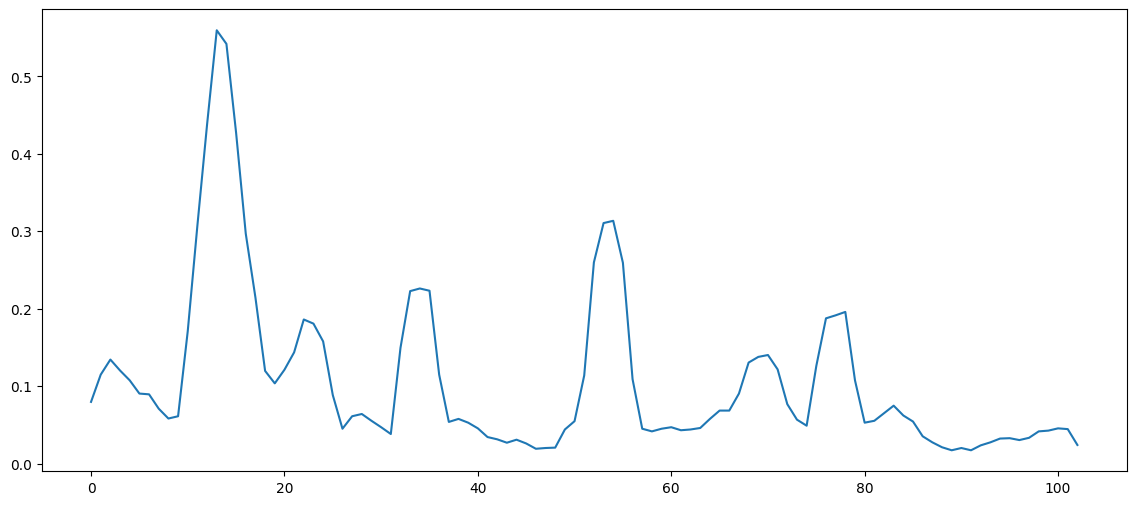

In [89]:
plt.figure(figsize=(14,6))
plt.plot(zcrs[0])

### Mel-Frequency Cepstral Coefficients (MFCC)

* 신호의 MFCC(Mel frequency cepstral coefficients)는 스펙트럼 포락선의 전체 모양을 간결하게 설명하는 작은 기능 집합 (일반적으로 약 10-20)
* 인간 목소리의 특성을 모델링

(20, 103)


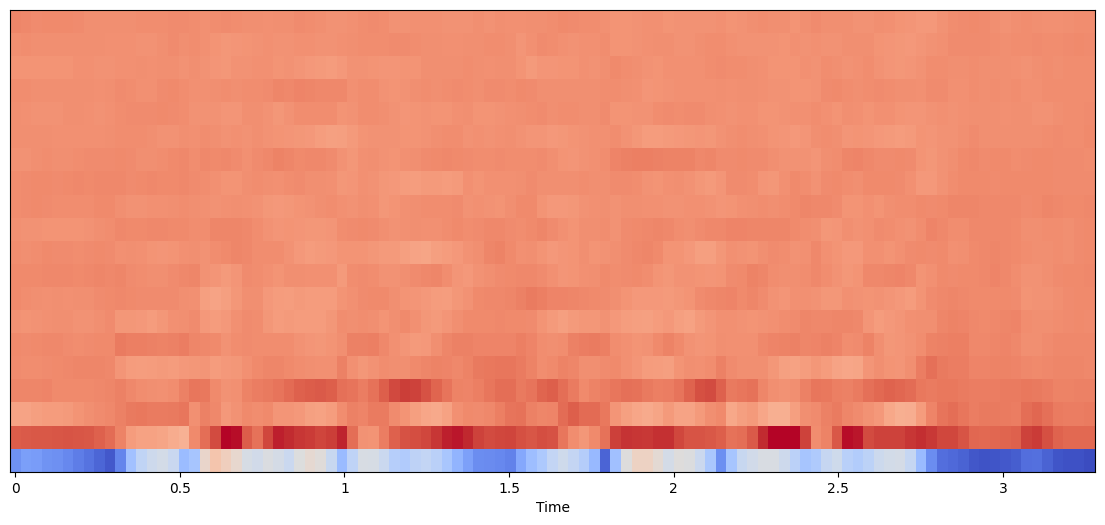

In [90]:
mfccs = librosa.feature.mfcc(y=audio_np, sr=sr)
print(mfccs.shape)

plt.figure(figsize=(14,6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### 크로마그램(Chromagram)

* 색도 특성 또는 벡터는  일반적으로 각각의 피치 클래스의 많은 에너지가, {C, C #, D, D 번호는, E, ..., B} 신호 내에 존재하는 방법을 나타내는 요소 특징 벡터
* 음악 작품 간의 유사성 측정을 설명하는 강력한 방법 제공

'\n해당 그림을 보았을때, pitch 클래스로 구분해서 그림을 나타낸건데 pitch class (왼쪽)을 보았을때 이게 시간에 따라서, 어느 피치가 어느타임에 얼마나 사용되었는지를 볼 수 있기 때문에 음향쪽에서 매우 좋은것이라고 할 수 있다. \n'

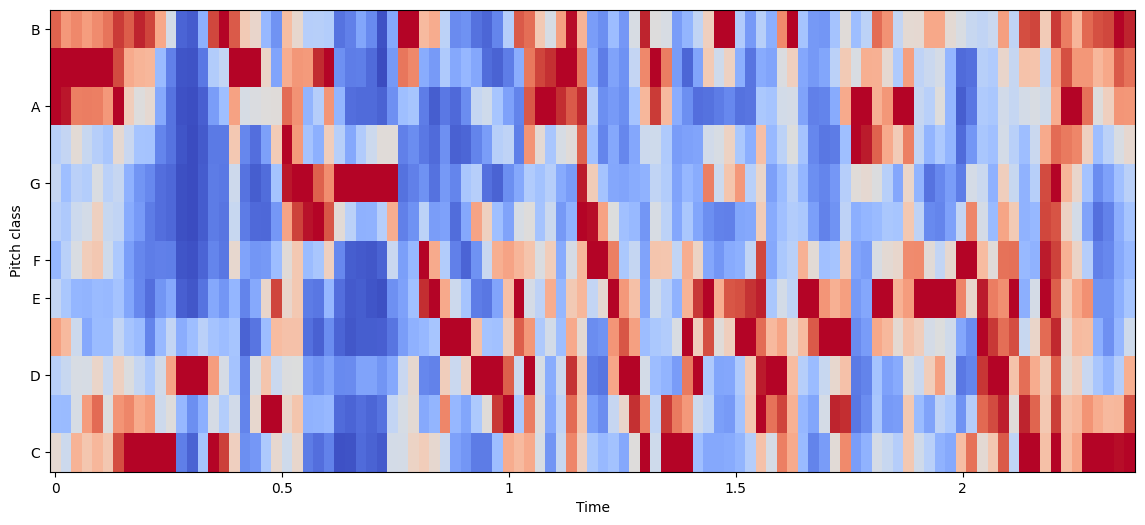

In [93]:
chromagram = librosa.feature.chroma_stft(y=audio_np, sr=sr, hop_length=512)
plt.figure(figsize=(14,6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma',
                         hop_length=512, cmap='coolwarm')

'''
해당 그림을 보았을때, pitch 클래스로 구분해서 그림을 나타낸건데 pitch class (왼쪽)을 보았을때 이게 시간에 따라서, 어느 피치가 어느타임에 얼마나 사용되었는지를 볼 수 있기 때문에 음향쪽에서 매우 좋은것이라고 할 수 있다.
'''

# 오디오 필터(Audio Filter)

In [94]:
from scipy.signal import butter, lfilter, freqz

def butter_pass(cutoff, fs, btype, order=5):
  nyq = 0.5 * fs
  normal_cutoff = cutoff / nyq
  b, a = butter(order, normal_cutoff, btype=btype, analog=False)
  return b, a

def butter_filter(data, cutoff, fs, btype, order=5):
  b, a = butter_pass(cutoff, fs, btype, order=order)
  y = lfilter(b, a, data)
  return y

In [96]:
order = 6
fs = 16000
cutoff = 2048

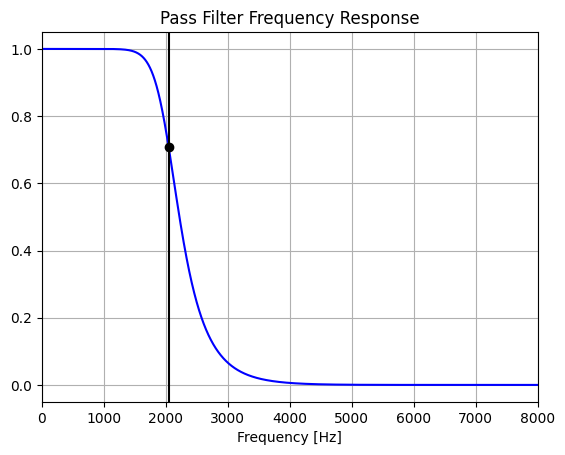

In [97]:
b, a = butter_pass(cutoff, fs, 'lowpass', order)

w, h = freqz(b, a, worN=8000)

plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Pass Filter Frequency Response")
plt.xlabel("Frequency [Hz]")
plt.grid()

In [98]:
T = len(audio_np) / sr
n = int(T*sr)
t = np.linspace(0, T, n, endpoint=False)

y=butter_filter(audio_np, cutoff, fs, 'lowpass', order)
ipd.Audio(y,rate=fs)

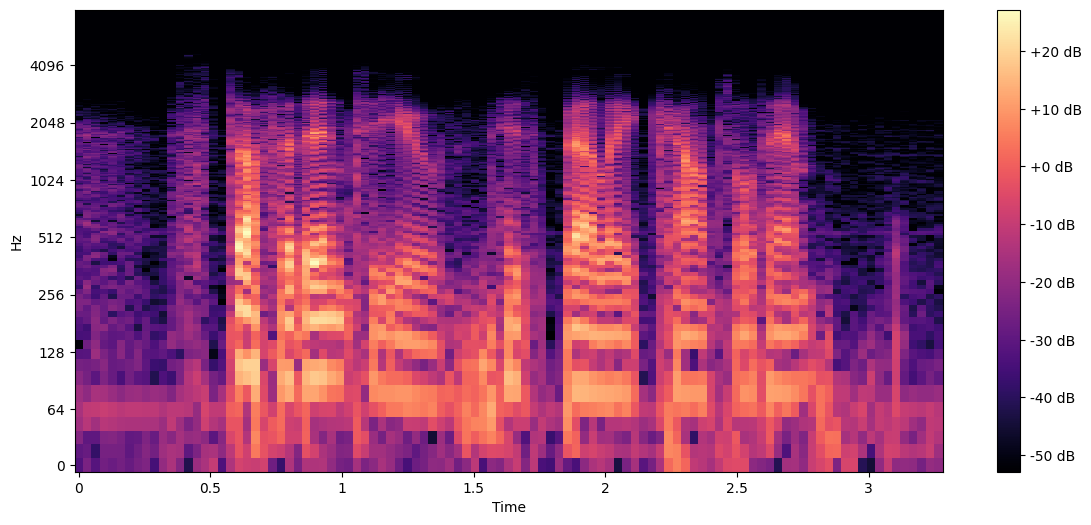

In [100]:
X = librosa.core.stft(y, n_fft=1024, hop_length=512, win_length=1024)
S = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 6))
librosa.display.specshow(S, sr=fs, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

#reference : http://suanlab.com/